In [1]:
import pandas as pd

# Read the dataset
data = pd.read_excel('dataset_with_mode.xlsx')
data.head()

# size of data
print(data.shape)


(6404, 17)


## Pre-processing
Getting dummies for categorical data

In [2]:
# Creating dummies for platform, genre, rating
print('Shape pre-dummies: ',data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print('Shape post-dummies: ',data.shape) #post-dummies shape

# Dropping features we wish to discard
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
print('New Columns: ', data.columns)

Shape pre-dummies:  (6404, 17)
Shape post-dummies:  (6404, 61)
New Columns:  Index(['Year_of_Release', 'Global_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Mode', 'Platform_2600', 'Platform_3DS',
       'Platform_DC', 'Platform_DS', 'Platform_GB', 'Platform_GBA',
       'Platform_GC', 'Platform_GEN', 'Platform_N64', 'Platform_NES',
       'Platform_NG', 'Platform_PC', 'Platform_PS', 'Platform_PS2',
       'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV',
       'Platform_SAT', 'Platform_SCD', 'Platform_SNES', 'Platform_WS',
       'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_AO', 'Rating_E',
       'Rating_E10+', 'Rating_EC', 'Rating_K-A', 'Rating_M', 'Rating_RP',

## Variables and Targer

In [3]:
#Variables
X = data[['Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy']]

#Target
Y = data[['Mode']]

## Test-Train Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#Check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (4803, 19)
Y_train shape: (4803, 1)
X_test shape: (1601, 19)
Y_test shape: (1601, 1)


## Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, Y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(Y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


C:\Users\shiva\AppData\Local\Temp\ipykernel_14376\669495143.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, Y_train)


Random Forest Accuracy: 0.6271080574640849


## Decision Tree Classifiers (Cart and ID3)

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the ID3 Decision Tree Classifier
id3_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the ID3 classifier
id3_classifier.fit(X_train, Y_train)

# Make predictions on the test set using ID3
id3_predictions = id3_classifier.predict(X_test)

# Evaluate the ID3 model
id3_accuracy = accuracy_score(Y_test, id3_predictions)
print("ID3 Accuracy:", id3_accuracy)

# Initialize the CART Decision Tree Classifier
cart_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the CART classifier
cart_classifier.fit(X_train, Y_train)

# Make predictions on the test set using CART
cart_predictions = cart_classifier.predict(X_test)

# Evaluate the CART model
cart_accuracy = accuracy_score(Y_test, cart_predictions)
print("\nCART Accuracy:", cart_accuracy)



ID3 Accuracy: 0.6221111805121798

CART Accuracy: 0.6221111805121798


## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression Classifier
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression Classifier
logistic_regression.fit(X_train, Y_train)

# Make predictions on the test set using Logistic Regression
logistic_regression_predictions = logistic_regression.predict(X_test)

# Evaluate the Logistic Regression model
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)



Logistic Regression Accuracy: 0.6152404747033104


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Naive Bayes Classifier

In [8]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naïve Bayes Classifier
naive_bayes = GaussianNB()

# Train the Naïve Bayes Classifier
naive_bayes.fit(X_train, Y_train)

# Make predictions on the test set using Naïve Bayes
naive_bayes_predictions = naive_bayes.predict(X_test)

# Evaluate the Naïve Bayes model
naive_bayes_accuracy = accuracy_score(Y_test, naive_bayes_predictions)
print("\nNaïve Bayes Accuracy:", naive_bayes_accuracy)



Naïve Bayes Accuracy: 0.5265459088069956


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN Classifier
k = 5  # Number of neighbors to consider
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN Classifier
knn_classifier.fit(X_train, Y_train)

# Make predictions on the test set using KNN
knn_predictions = knn_classifier.predict(X_test)

# Evaluate the KNN model
knn_accuracy = accuracy_score(Y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy: 0.5384134915677702


## Comparison

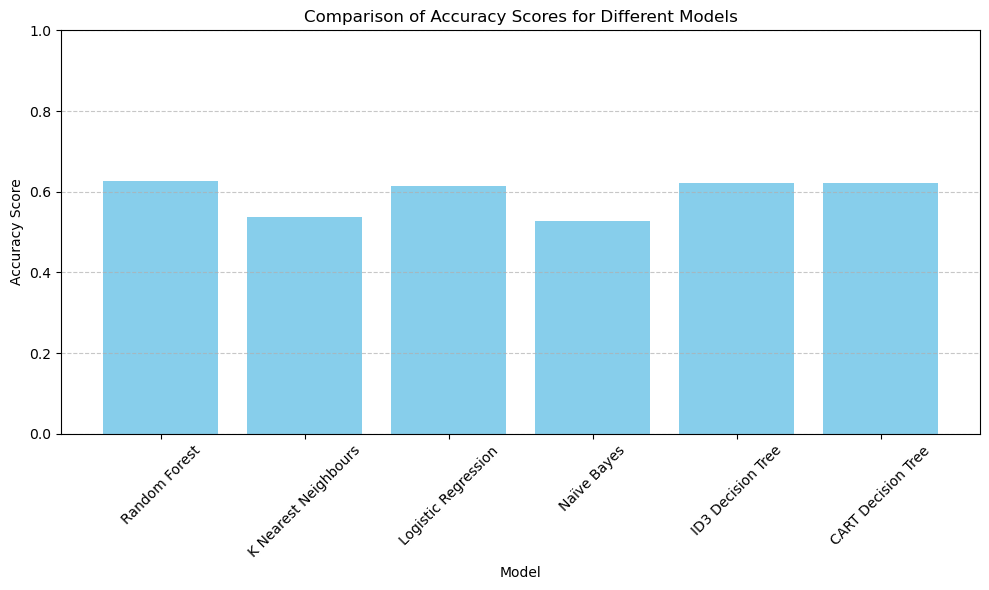

In [18]:
import matplotlib.pyplot as plt

# List of model names
models = ['Random Forest','K Nearest Neighbours','Logistic Regression', 'Naïve Bayes', 'ID3 Decision Tree', 'CART Decision Tree']

# List of accuracy scores for each model
accuracy_scores = [rf_accuracy, knn_accuracy, logistic_regression_accuracy, naive_bayes_accuracy, id3_accuracy, cart_accuracy ]  # Replace with your actual accuracy scores

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Models')

# Displaying the plot
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Updating Dataset using Random Forest

In [9]:
# Read the dataset
data = pd.read_excel('dataset_without_mode.xlsx')
data2 = pd.read_excel('dataset_without_mode.xlsx')
data.head()

# size of data
print(data.shape)

(4429, 16)


In [12]:
# Creating dummies for platform, genre, rating
print('Shape pre-dummies: ',data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print('Shape post-dummies: ',data.shape) #post-dummies shape

# Dropping features we wish to discard
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
print('New Columns: ', data.columns)

Shape pre-dummies:  (4429, 16)
Shape post-dummies:  (4429, 47)
New Columns:  Index(['Year_of_Release', 'Global_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_3DS', 'Platform_DS',
       'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XB', 'Platform_XOne', 'Genre_Action', 'Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_E',
       'Rating_E10+', 'Rating_EC', 'Rating_M', 'Rating_RP', 'Rating_T'],
      dtype='object')


In [13]:
#Variables
X = data[['Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy']]



In [14]:
predictions = rf_classifier.predict(X)
data2['Mode'] = predictions


In [15]:
data2.to_excel('final_dataset.xlsx', index=False)